In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("loan_dataset_final.csv", encoding='latin1')

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,...,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,atlantic tomorrows office,1 year,RENT,...,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,The Red Threads Inc.,6 years,RENT,...,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,T-Mobile USA Inc,9 years,MORTGAGE,...,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female
3,1000045,1225655,14000,14000,14000.0,60 months,349.98,Trader Joe's,9 years,MORTGAGE,...,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,White,Female
4,1000067,1225680,15000,15000,14975.0,60 months,370.94,Truevance Engineering,< 1 year,RENT,...,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,White,Female


In [3]:
df = df.drop(['emp_title', 'title', 'desc', 'collections_12_mths_ex_med'], axis=1)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,1 year,RENT,34992.0,...,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,6 years,RENT,72000.0,...,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,9 years,MORTGAGE,81708.0,...,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female
3,1000045,1225655,14000,14000,14000.0,60 months,349.98,9 years,MORTGAGE,72000.0,...,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,White,Female
4,1000067,1225680,15000,15000,14975.0,60 months,370.94,< 1 year,RENT,72000.0,...,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,White,Female


In [4]:
df = df.replace(['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off', 'In Grace Period', 
                 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off', 'Default'],
                 [1, 1, 1, 0, 1, 0, 0, 0, 0])

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,1 year,RENT,34992.0,...,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,6 years,RENT,72000.0,...,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,9 years,MORTGAGE,81708.0,...,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female
3,1000045,1225655,14000,14000,14000.0,60 months,349.98,9 years,MORTGAGE,72000.0,...,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,White,Female
4,1000067,1225680,15000,15000,14975.0,60 months,370.94,< 1 year,RENT,72000.0,...,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,White,Female


In [5]:
df = df.replace(['1 year', '6 years', '9 years', '< 1 year', '8 years', '10+ years', '5 years', '2 years', '3 years', '4 years', '7 years'],
                [1, 6, 9, 0, 8, 10, 5, 2, 3, 4, 7])

df['emp_length'] = df['emp_length'].fillna(0)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,1.0,RENT,34992.0,...,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,6.0,RENT,72000.0,...,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,9.0,MORTGAGE,81708.0,...,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female
3,1000045,1225655,14000,14000,14000.0,60 months,349.98,9.0,MORTGAGE,72000.0,...,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,White,Female
4,1000067,1225680,15000,15000,14975.0,60 months,370.94,0.0,RENT,72000.0,...,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,White,Female


In [6]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].mean())

In [7]:
df['Division'] = df['loan_amnt'] / df['annual_inc']
df['lti'] = df['lti'].fillna(df['Division'])


df = df.drop(columns=['Division'])

In [8]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].max()*5)
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(df['mths_since_last_record'].max()*5)
df['month_since_oldest_tl'] = df['month_since_oldest_tl'].fillna(df['month_since_oldest_tl'].max()*5)

In [9]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)
df['open_acc'] = df['open_acc'].fillna(0)
df['pub_rec'] = df['pub_rec'].fillna(0)
df['total_acc'] = df['total_acc'].fillna(0)
# df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['revol_utilization'] = df['revol_utilization'].fillna(0)

In [10]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
installment                0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
pub_rec_bankru

In [11]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

categorical_columns

Index(['term', 'home_ownership', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'race_name', 'gender'],
      dtype='object')

In [12]:
continuous_columns = continuous_columns.to_list()

continuous_columns.remove('loan_status')
continuous_columns.remove('id')
continuous_columns.remove('member_id')

In [13]:
one_hot_encoded = pd.get_dummies(df['term'], prefix='term')

one_hot_encoded.astype(int).head()

,term_36 months,term_60 months
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [14]:
for col in categorical_columns:
    one_hot_encoded = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, one_hot_encoded.astype(int)], axis=1)

    df = df.drop(columns=[col])

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,loan_status,dti,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,race_name_African American,race_name_Asian,race_name_Other,race_name_White,gender_Female,gender_Male
0,1000007,1225615,5150,5150,5150.0,132.58,1.0,34992.0,1,17.59,...,0,0,0,0,0,0,0,1,1,0
1,1000030,1225638,20000,20000,20000.0,635.07,6.0,72000.0,1,7.80,...,0,0,0,0,1,0,0,0,1,0
2,1000033,1225642,12800,12800,12750.0,316.54,9.0,81708.0,1,14.22,...,0,0,0,0,0,0,0,1,1,0
3,1000045,1225655,14000,14000,14000.0,349.98,9.0,72000.0,1,20.35,...,0,0,0,0,0,0,0,1,1,0
4,1000067,1225680,15000,15000,14975.0,370.94,0.0,72000.0,1,20.50,...,0,0,0,0,0,0,0,1,1,0


# Training on original dataset

In [15]:
x = df.drop(['loan_status', 'id', 'member_id'], axis=1)
y = df['loan_status']

# Standardize continuous variables
scaler = StandardScaler()
x[continuous_columns] = scaler.fit_transform(x[continuous_columns])

x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,race_name_African American,race_name_Asian,race_name_Other,race_name_White,gender_Female,gender_Male
0,-0.801490,-0.793581,-0.699679,-0.909624,-1.051618,-0.532738,0.626942,-0.297409,0.990289,0.760435,...,0,0,0,0,0,0,0,1,1,0
1,1.202328,1.284264,1.382602,1.495500,0.334139,0.044677,-0.828553,-0.297409,0.405887,0.760435,...,0,0,0,0,1,0,0,0,1,0
2,0.230780,0.276824,0.366000,-0.029116,1.165594,0.196145,0.125918,1.654796,-0.178515,-1.385193,...,0,0,0,0,0,0,0,1,1,0
3,0.392705,0.444731,0.541277,0.130942,1.165594,0.044677,1.037275,-0.297409,-0.178515,0.760435,...,0,0,0,0,0,0,0,1,1,0
4,0.527642,0.584653,0.677992,0.231265,-1.328770,0.044677,1.059576,-0.297409,-0.762917,0.760435,...,0,0,0,0,0,0,0,1,1,0


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=101)

Fitting Logistic Regression


In [17]:
logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)

c:\Users\unnat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = logistic_model.predict(x_test)
y_pred2 = logistic_model.predict(x_train)

train_acc = accuracy_score(y_train, y_pred2)
accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", accuracy)

Train Accuracy: 0.9960170382253692
Test Accuracy: 0.9946716815546153


In [19]:
feature_importance = pd.DataFrame({'feature': x.columns, 'coefficient': logistic_model.coef_[0]})

feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

In [20]:
pd.set_option('display.max_rows', None)  # Set to None to display all rows
pd.set_option('display.max_columns', None)  # Set to None to display all columns

print(feature_importance)

                                 feature  coefficient  abs_coefficient
19                       total_rec_prncp    12.124177        12.124177
22                            recoveries    -8.456603         8.456603
1                            funded_amnt    -8.011582         8.011582
17                           total_pymnt     7.412549         7.412549
2                        funded_amnt_inv    -6.928697         6.928697
18                       total_pymnt_inv     5.809663         5.809663
20                         total_rec_int    -4.893596         4.893596
3                            installment    -3.937281         3.937281
28                            fico_score     3.147007         3.147007
23               collection_recovery_fee    -2.602160         2.602160
25                         interest_rate     2.101841         2.101841
0                              loan_amnt    -1.725756         1.725756
50                        issue_d_Dec-07     1.582063         1.582063
140   

Fitting Decision Tree on encoded dataset

In [21]:
# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=1)

In [22]:
# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print(f"Best cross-validation score: {random_search.best_score_}")

# Evaluate on the test set
best_clf = random_search.best_estimator_
test_score = best_clf.score(x_test, y_test)
print(f"Test set score: {test_score}")

Best parameters found:  {'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy'}
Best cross-validation score: 0.9943298036940611
Test set score: 0.9954552577965836


Random Forest fitted on processed dataset

In [23]:
# Step 5: Define the parameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Step 6: Set up the RandomizedSearchCV
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Step 7: Fit the model
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\unnat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000241A09C7070>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000241A09C7D30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002419CB3BF70>},
                   random_state=42, verbose=2)

In [24]:
# Step 8: Evaluate the best model
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(x_test)
y_pred_train = best_rf_model.predict(x_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Train accuracy = {accuracy_score(y_train, y_pred_train)}")
print(f"Test accuracy = {accuracy_score(y_test, y_pred)}")

Best Parameters: {'bootstrap': False, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 137}
Train accuracy = 1.0
Test accuracy = 0.9948283968030089


Decision Tree on Non-Scaled Dataset

In [25]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,term_36 months,term_60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,issue_d_Jul-11,issue_d_Jun-07,issue_d_Jun-08,issue_d_Jun-09,issue_d_Jun-10,issue_d_Jun-11,issue_d_Mar-08,issue_d_Mar-09,issue_d_Mar-10,issue_d_Mar-11,issue_d_May-08,issue_d_May-09,issue_d_May-10,issue_d_May-11,issue_d_Nov-07,issue_d_Nov-08,issue_d_Nov-09,issue_d_Nov-10,issue_d_Nov-11,issue_d_Oct-07,issue_d_Oct-08,issue_d_Oct-09,issue_d_Oct-10,issue_d_Oct-11,issue_d_Sep-07,issue_d_Sep-08,issue_d_Sep-09,issue_d_Sep-10,issue_d_Sep-11,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,race_name_African American,race_name_Asian,race_name_Other,race_name_White,gender_Female,gender_Male
0,1000007,1225615,5150,5150,5150.0,132.58,1.0,34992.0,1,17.59,0.0,3.0,600.0,113.0,15.0,1.0,15187,21.0,266.22,266.22,7674.25000,7674.25,4883.78,2790.47,0.0,0.0,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1000030,1225638,20000,20000,20000.0,635.07,6.0,72000.0,1,7.80,0.0,2.0,600.0,595.0,6.0,0.0,15637,14.0,0.00,0.00,22610.98773,22610.99,20000.00,2610.99,0.0,0.0,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1000033,1225642,12800,12800,12750.0,316.54,9.0,81708.0,1,14.22,1.0,1.0,15.0,595.0,7.0,0.0,905,23.0,0.00,0.00,14401.17047,14344.92,12800.00,1601.17,0.0,0.0,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
label = df.drop(['id', 'member_id', 'loan_status'], axis=1)
output = df['loan_status']

x_train_or, x_test_or, y_train_or, y_test_or = train_test_split(label, output, test_size=0.15, random_state=101)

# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the Decision Tree classifier
clf2 = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf2,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(x_train_or, y_train_or)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=1)

In [27]:
# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print(f"Best cross-validation score: {random_search.best_score_}")

# Evaluate on the test set
best_clf = random_search.best_estimator_
test_score = best_clf.score(x_test_or, y_test_or)
print(f"Test set score: {test_score}")

Best parameters found:  {'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy'}
Best cross-validation score: 0.9943298075196065
Test set score: 0.99529854254819


Random Forest on unscaled data

In [28]:
# Step 5: Define the parameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Step 6: Set up the RandomizedSearchCV
rf_model2 = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model2,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Step 7: Fit the model
random_search.fit(x_train_or, y_train_or)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\unnat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000241A09C6980>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002419CB3BDC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000241A09C67D0>},
                   random_state=42, verbose=2)

In [29]:
# Step 8: Evaluate the best model
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(x_test_or)
y_pred_train = best_rf_model.predict(x_train_or)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Train accuracy = {accuracy_score(y_train_or, y_pred_train)}")
print(f"Test accuracy = {accuracy_score(y_test_or, y_pred)}")

Best Parameters: {'bootstrap': False, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 137}
Train accuracy = 1.0
Test accuracy = 0.9951418272997963


XGBoost on unscaled data

In [30]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Step 6: Set up the RandomizedSearchCV
xgb_model = XGBClassifier(random_state=101, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=101,
    n_jobs=-1   # Use all available cores
)

# Step 7: Fit the model
random_search.fit(x_train_or, y_train_or)

# Step 8: Evaluate the best model
best_xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\unnat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\unnat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\unnat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [31]:
print(f"Best Parameters: {random_search.best_params_}")
print(f"Train accuracy: {accuracy_score(y_train_or, best_xgb_model.predict(x_train_or))}")
print(f"Test accuracy: {accuracy_score(y_test_or, best_xgb_model.predict(x_test_or))}")

Best Parameters: {'colsample_bytree': 0.958744461102411, 'gamma': 0.16047221414553242, 'learning_rate': 0.23098438065092225, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 165, 'subsample': 0.958397859442}
Train accuracy: 0.9999723405432317
Test accuracy: 0.9987462780128507


In [32]:
x_train_or.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,term_36 months,term_60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,issue_d_Jul-11,issue_d_Jun-07,issue_d_Jun-08,issue_d_Jun-09,issue_d_Jun-10,issue_d_Jun-11,issue_d_Mar-08,issue_d_Mar-09,issue_d_Mar-10,issue_d_Mar-11,issue_d_May-08,issue_d_May-09,issue_d_May-10,issue_d_May-11,issue_d_Nov-07,issue_d_Nov-08,issue_d_Nov-09,issue_d_Nov-10,issue_d_Nov-11,issue_d_Oct-07,issue_d_Oct-08,issue_d_Oct-09,issue_d_Oct-10,issue_d_Oct-11,issue_d_Sep-07,issue_d_Sep-08,issue_d_Sep-09,issue_d_Sep-10,issue_d_Sep-11,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,race_name_African American,race_name_Asian,race_name_Other,race_name_White,gender_Female,gender_Male
16131,3000,3000,2925.0,65.97,10.0,48000.0,11.75,0.0,1.0,80.0,66.0,9.0,1.0,9910,18.0,0.0,0.0,3085.101723,3007.97,3000.0,85.10,0.0,0.0,0.0,0.0,0.1149,0.819,1,709,0.062500,85.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
32311,4000,4000,4000.0,134.76,0.0,86400.0,4.57,5.0,0.0,6.0,595.0,6.0,0.0,920,24.0,0.0,0.0,4743.733709,4743.73,4000.0,743.73,0.0,0.0,0.0,0.0,0.1299,0.541,1,694,0.046296,53.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
17892,5500,5500,5500.0,182.32,2.0,30000.0,5.32,0.0,0.0,53.0,595.0,8.0,0.0,4404,20.0,0.0,0.0,6564.094576,6564.09,5500.0,1064.09,0.0,0.0,0.0,0.0,0.1186,0.722,1,714,0.183333,112.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4760,14000,14000,10675.0,450.17,1.0,45000.0,11.31,0.0,0.0,61.0,595.0,6.0,0

<Figure size 20000x10000 with 0 Axes>

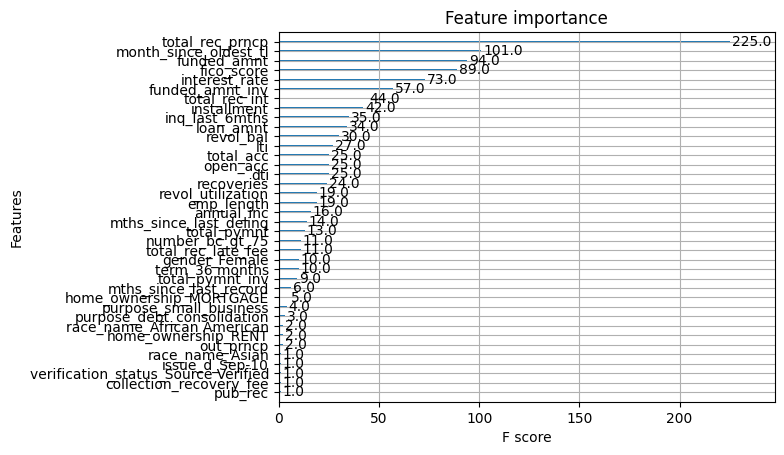

In [33]:
plt.figure(figsize=(200,100))
xgb.plot_importance(best_xgb_model)


plt.show()

In [34]:
# Get the feature importances as a dictionary
importances = best_xgb_model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for easier viewing
import pandas as pd
importance_df = pd.DataFrame.from_dict(importances, orient='index', columns=['importance'])
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Display the DataFrame
print(importance_df)

                                     importance
total_rec_prncp                           225.0
month_since_oldest_tl                     101.0
funded_amnt                                94.0
fico_score                                 89.0
interest_rate                              73.0
funded_amnt_inv                            57.0
total_rec_int                              44.0
installment                                42.0
inq_last_6mths                             35.0
loan_amnt                                  34.0
revol_bal                                  30.0
lti                                        27.0
open_acc                                   25.0
total_acc                                  25.0
dti                                        25.0
recoveries                                 24.0
emp_length                                 19.0
revol_utilization                          19.0
annual_inc                                 16.0
mths_since_last_delinq                  

In [35]:
sample_index = np.random.choice(x_test_or.shape[0], 1, replace=False)
x_test_sample = x_test_or.iloc[sample_index]

print(sample_index)
x_test_sample.unstack()

[6203]


loan_amnt                            21168    10000.000000
funded_amnt                          21168    10000.000000
funded_amnt_inv                      21168     9925.000000
installment                          21168      246.870000
emp_length                           21168        6.000000
annual_inc                           21168    45000.000000
dti                                  21168       23.390000
delinq_2yrs                          21168        0.000000
inq_last_6mths                       21168        0.000000
mths_since_last_delinq               21168      600.000000
mths_since_last_record               21168      595.000000
open_acc                             21168       16.000000
pub_rec                              21168        0.000000
revol_bal                            21168    12959.000000
total_acc                            21168       26.000000
out_prncp                            21168        0.000000
out_prncp_inv                        21168        0.0000

In [48]:
import shap

# Explain the model's predictions with SHAP
explainer = shap.Explainer(best_xgb_model, x_train_or)
shap_values = explainer.shap_values(x_test_sample)  # x_test_sample should be a single data point

# Visualize the explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_test_sample)

 99%|===================| 35969/36154 [01:51<00:00]        

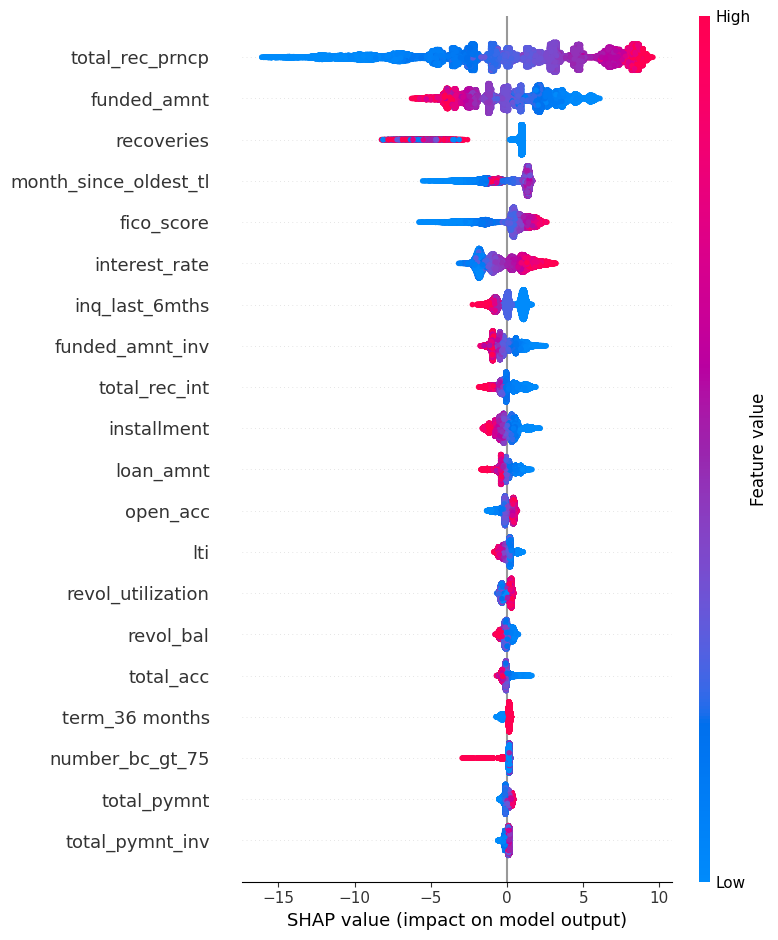

In [37]:
# Summary plot
shap_values2 = explainer.shap_values(x_train_or)
shap.summary_plot(shap_values2, x_train_or)

# Training on dataset with removed sensitive fields

In [38]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,term_36 months,term_60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,issue_d_Jul-11,issue_d_Jun-07,issue_d_Jun-08,issue_d_Jun-09,issue_d_Jun-10,issue_d_Jun-11,issue_d_Mar-08,issue_d_Mar-09,issue_d_Mar-10,issue_d_Mar-11,issue_d_May-08,issue_d_May-09,issue_d_May-10,issue_d_May-11,issue_d_Nov-07,issue_d_Nov-08,issue_d_Nov-09,issue_d_Nov-10,issue_d_Nov-11,issue_d_Oct-07,issue_d_Oct-08,issue_d_Oct-09,issue_d_Oct-10,issue_d_Oct-11,issue_d_Sep-07,issue_d_Sep-08,issue_d_Sep-09,issue_d_Sep-10,issue_d_Sep-11,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,race_name_African American,race_name_Asian,race_name_Other,race_name_White,gender_Female,gender_Male
0,1000007,1225615,5150,5150,5150.0,132.58,1.0,34992.0,1,17.59,0.0,3.0,600.0,113.0,15.0,1.0,15187,21.0,266.22,266.22,7674.25000,7674.25,4883.78,2790.47,0.0,0.0,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1000030,1225638,20000,20000,20000.0,635.07,6.0,72000.0,1,7.80,0.0,2.0,600.0,595.0,6.0,0.0,15637,14.0,0.00,0.00,22610.98773,22610.99,20000.00,2610.99,0.0,0.0,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1000033,1225642,12800,12800,12750.0,316.54,9.0,81708.0,1,14.22,1.0,1.0,15.0,595.0,7.0,0.0,905,23.0,0.00,0.00,14401.17047,14344.92,12800.00,1601.17,0.0,0.0,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [41]:
# Word to filter columns by
word_to_filter = ('addr_state', 'gender', 'race_name')

# Identify columns to drop
columns_to_drop = [col for col in df.columns if col.startswith(word_to_filter)]

columns_to_drop

['addr_state_AK',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IA',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_state_WA',
 'addr_state_WI',
 'addr_state_WV',
 'addr_state_WY',
 'race_name_African American',
 'race_name_Asian',
 'race_name_Other',
 'race_name_White',
 'gender_

In [43]:
df = df.drop(columns=columns_to_drop)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,term_36 months,term_60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,issue_d_Jul-11,issue_d_Jun-07,issue_d_Jun-08,issue_d_Jun-09,issue_d_Jun-10,issue_d_Jun-11,issue_d_Mar-08,issue_d_Mar-09,issue_d_Mar-10,issue_d_Mar-11,issue_d_May-08,issue_d_May-09,issue_d_May-10,issue_d_May-11,issue_d_Nov-07,issue_d_Nov-08,issue_d_Nov-09,issue_d_Nov-10,issue_d_Nov-11,issue_d_Oct-07,issue_d_Oct-08,issue_d_Oct-09,issue_d_Oct-10,issue_d_Oct-11,issue_d_Sep-07,issue_d_Sep-08,issue_d_Sep-09,issue_d_Sep-10,issue_d_Sep-11,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1000007,1225615,5150,5150,5150.0,132.58,1.0,34992.0,1,17.59,0.0,3.0,600.0,113.0,15.0,1.0,15187,21.0,266.22,266.22,7674.25000,7674.25,4883.78,2790.47,0.0,0.0,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1000030,1225638,20000,20000,20000.0,635.07,6.0,72000.0,1,7.80,0.0,2.0,600.0,595.0,6.0,0.0,15637,14.0,0.00,0.00,22610.98773,22610.99,20000.00,2610.99,0.0,0.0,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1000033,1225642,12800,12800,12750.0,316.54,9.0,81708.0,1,14.22,1.0,1.0,15.0,595.0,7.0,0.0,905,23.0,0.00,0.00,14401.17047,14344.92,12800.00,1601.17,0.0,0.0,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1000045,1225655,14000,14000,14000.0,349.98,9.0,72000.0,1,20.35,0.0,1.0,600.0,595.0,16.0,0.0,9218,39.0,0.00,0.00,14793.06399,14793.06,14000.00,793.06,0.0,0.0,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1000067,1225680,15000,15000,14975.0,370.94,0.0,72000.0,1,20.50,0.0,0.0,600.0,595.0,12.0,0.0,10891,30.0,754.69,753.37,21457.45000,21421.81,14245.32,7212.13,0.0,0.0,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
x = df.drop(['loan_status', 'id', 'member_id'], axis=1)
y = df['loan_status']

# Standardize continuous variables
# scaler = StandardScaler()
# x[continuous_columns] = scaler.fit_transform(x[continuous_columns])

x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,term_36 months,term_60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,issue_d_Jul-11,issue_d_Jun-07,issue_d_Jun-08,issue_d_Jun-09,issue_d_Jun-10,issue_d_Jun-11,issue_d_Mar-08,issue_d_Mar-09,issue_d_Mar-10,issue_d_Mar-11,issue_d_May-08,issue_d_May-09,issue_d_May-10,issue_d_May-11,issue_d_Nov-07,issue_d_Nov-08,issue_d_Nov-09,issue_d_Nov-10,issue_d_Nov-11,issue_d_Oct-07,issue_d_Oct-08,issue_d_Oct-09,issue_d_Oct-10,issue_d_Oct-11,issue_d_Sep-07,issue_d_Sep-08,issue_d_Sep-09,issue_d_Sep-10,issue_d_Sep-11,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5150,5150,5150.0,132.58,1.0,34992.0,17.59,0.0,3.0,600.0,113.0,15.0,1.0,15187,21.0,266.22,266.22,7674.25000,7674.25,4883.78,2790.47,0.0,0.0,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,20000,20000,20000.0,635.07,6.0,72000.0,7.80,0.0,2.0,600.0,595.0,6.0,0.0,15637,14.0,0.00,0.00,22610.98773,22610.99,20000.00,2610.99,0.0,0.0,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,12800,12800,12750.0,316.54,9.0,81708.0,14.22,1.0,1.0,15.0,595.0,7.0,0.0,905,23.0,0.00,0.00,14401.17047,14344.92,12800.00,1601.17,0.0,0.0,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,14000,14000,14000.0,349.98,9.0,72000.0,20.35,0.0,1.0,600.0,595.0,16.0,0.0,9218,39.0,0.00,0.00,14793.06399,14793.06,14000.00,793.06,0.0,0.0,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15000,15000,14975.0,370.94,0.0,72000.0,20.50,0.0,0.0,600.0,595.0,12.0,0.0,10891,30.0,754.69,753.37,21457.45000,21421.81,14245.32,7212.13,0.0,0.0,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=101)

In [46]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Step 6: Set up the RandomizedSearchCV
xgb_model = XGBClassifier(random_state=101, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=101,
    n_jobs=-1   # Use all available cores
)

# Step 7: Fit the model
random_search.fit(x_train, y_train)

# Step 8: Evaluate the best model
best_xgb_model = random_search.best_estimator_

c:\Users\unnat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\unnat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\unnat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [47]:
print(f"Best Parameters: {random_search.best_params_}")
print(f"Train accuracy: {accuracy_score(y_train, best_xgb_model.predict(x_train))}")
print(f"Test accuracy: {accuracy_score(y_test, best_xgb_model.predict(x_test))}")

Best Parameters: {'colsample_bytree': 0.8581413899233861, 'gamma': 0.24033062236138253, 'learning_rate': 0.2873474781957963, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 93, 'subsample': 0.9792141250007974}
Train accuracy: 0.9998893621729269
Test accuracy: 0.9984328475160633


In [50]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

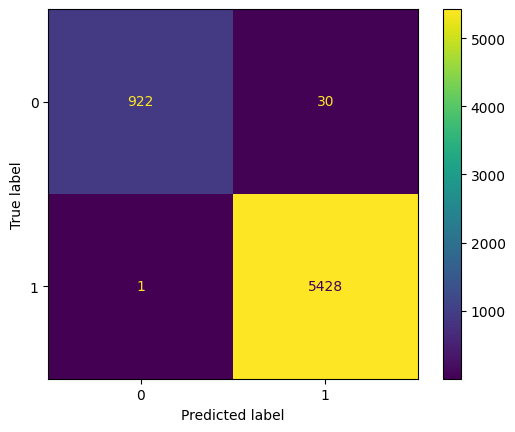

In [51]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()

In [53]:
tn, fp, fn, tp = cm.ravel()

# Calculate recall for each class
recall_pos = tp / (tp + fn)  # Recall for the positive class
recall_neg = tn / (tn + fp)  # Recall for the negative class

# Calculate balanced accuracy
balanced_accuracy = (recall_pos + recall_neg) / 2

print(f"Balanced Accuracy: {balanced_accuracy}")

Balanced Accuracy: 0.9841515994867278


# Trying to handle class imbalance

In [55]:
x_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,term_36 months,term_60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,issue_d_Jul-11,issue_d_Jun-07,issue_d_Jun-08,issue_d_Jun-09,issue_d_Jun-10,issue_d_Jun-11,issue_d_Mar-08,issue_d_Mar-09,issue_d_Mar-10,issue_d_Mar-11,issue_d_May-08,issue_d_May-09,issue_d_May-10,issue_d_May-11,issue_d_Nov-07,issue_d_Nov-08,issue_d_Nov-09,issue_d_Nov-10,issue_d_Nov-11,issue_d_Oct-07,issue_d_Oct-08,issue_d_Oct-09,issue_d_Oct-10,issue_d_Oct-11,issue_d_Sep-07,issue_d_Sep-08,issue_d_Sep-09,issue_d_Sep-10,issue_d_Sep-11,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
16131,3000,3000,2925.0,65.97,10.0,48000.0,11.75,0.0,1.0,80.0,66.0,9.0,1.0,9910,18.0,0.0,0.0,3085.101723,3007.97,3000.0,85.10,0.0,0.0,0.0,0.0,0.1149,0.819,1,709,0.062500,85.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
32311,4000,4000,4000.0,134.76,0.0,86400.0,4.57,5.0,0.0,6.0,595.0,6.0,0.0,920,24.0,0.0,0.0,4743.733709,4743.73,4000.0,743.73,0.0,0.0,0.0,0.0,0.1299,0.541,1,694,0.046296,53.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17892,5500,5500,5500.0,182.32,2.0,30000.0,5.32,0.0,0.0,53.0,595.0,8.0,0.0,4404,20.0,0.0,0.0,6564.094576,6564.09,5500.0,1064.09,0.0,0.0,0.0,0.0,0.1186,0.722,1,714,0.183333,112.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4760,14000,14000,10675.0,450.17,1.0,45000.0,11.31,0.0,0.0,61.0,595.0,6.0,0.0,14571,25.0,0.0,0.0,15983.971200,12187.78,14000.0,1983.97,0.0,0.0,0.0,0.0,0.0976,0.595,1,729,0.311111,91.0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
30999,14000,14000,13650.0,435.43,8.0,200000.0,1.21,0.0,0.0,600.0,595.0,5.0,0.0,0,19.0,0.0,0.0,14308.004370,13950.30,14000.0,308.00,0.0,0.0,0.0,0.0,0.0749,0.000,0,774,0.070000,51.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [58]:
(y_train == 1).sum(), (y_train == 0).sum()

(30674, 5480)

In [61]:
(y_train == 0).sum()/len(y_train)

0.15157382309011452

SMOTE

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

In [74]:
# Step 1: Apply SMOTE to balance the classes
smote = SMOTE(random_state=101)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# # Step 2: Calculate class weights for the resampled data
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_resampled), y=y_resampled)
# class_weights_dict = dict(enumerate(class_weights))

# class_weights_dict

In [75]:
(y_resampled == 0).sum()/len(y_resampled)

0.5

In [76]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Step 5: Initialize XGBoost Model
xgb_model = XGBClassifier(random_state=101, eval_metric='logloss')

# Step 6: Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=101,
    n_jobs=-1   # Use all available cores
)

# Step 7: Fit the model
random_search.fit(x_resampled, y_resampled)

# Step 8: Evaluate the best model
best_xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [77]:
best_xgb_model.predict(x_resampled)

array([1, 1, 1, ..., 0, 0, 0])

In [78]:
accuracy_score(y_true=y_resampled, y_pred=best_xgb_model.predict(x_resampled))

1.0

In [79]:
accuracy_score(y_true=y_test, y_pred=best_xgb_model.predict(x_test))

0.9982761322676696

In [80]:
y_pred=best_xgb_model.predict(x_test)

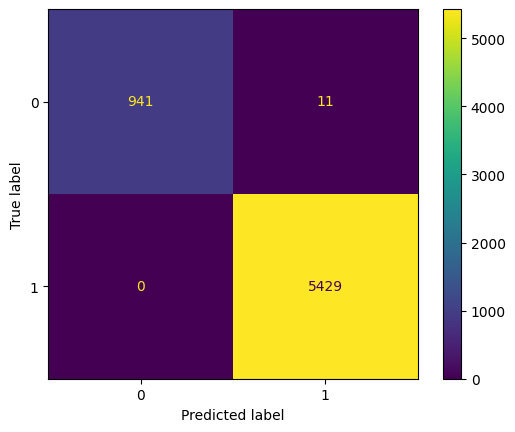

In [81]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

100%|===================| 61324/61348 [03:43<00:00]        

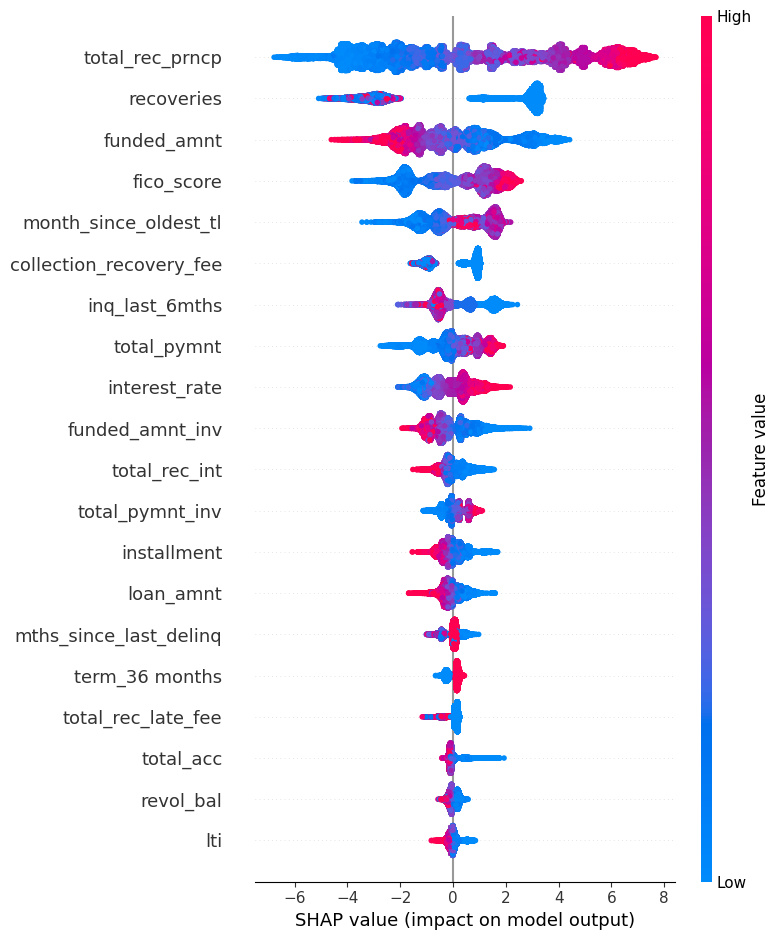

In [83]:
explainer = shap.Explainer(best_xgb_model, x_resampled)

shap_res = explainer.shap_values(x_resampled)
shap.summary_plot(shap_res, x_resampled)

 97%|=================== | 6202/6381 [00:27<00:00]       

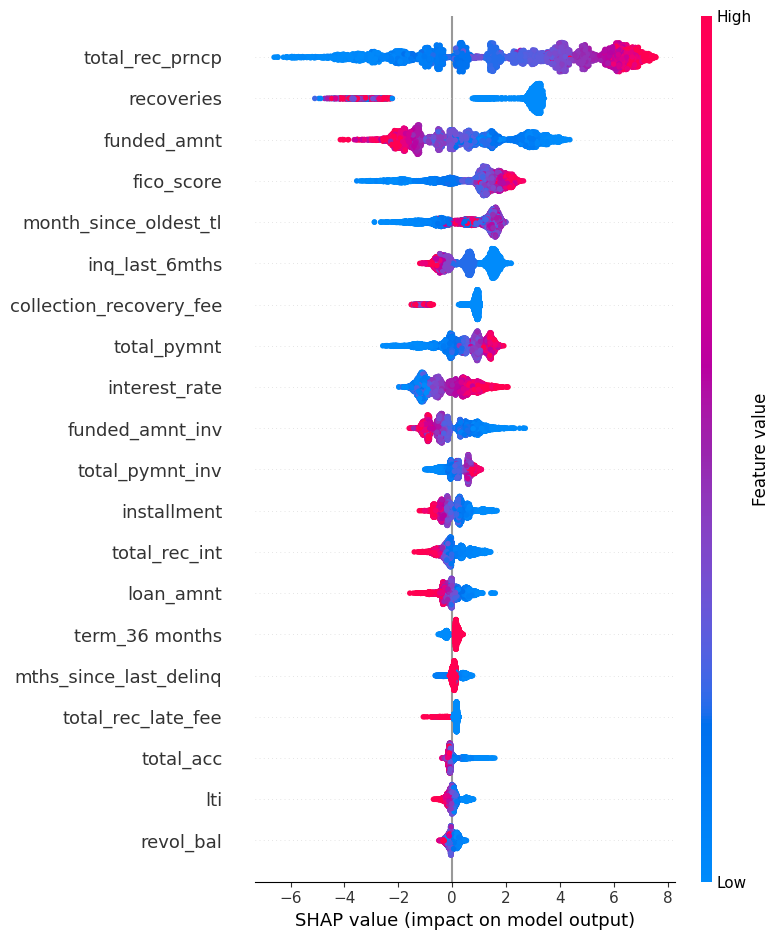

In [84]:
shap_res = explainer.shap_values(x_test)
shap.summary_plot(shap_res, x_test)

In [85]:
import random

In [91]:
random_index = random.randint(0, len(x_test) - 1)
sample = x_test.iloc[random_index]

y_sample = y_test.iloc[random_index]

In [93]:
random_index

5589

In [99]:
sample

loan_amnt                               9000.000000
funded_amnt                             9000.000000
funded_amnt_inv                         8925.000000
installment                              317.710000
emp_length                                 0.000000
annual_inc                             33098.880000
dti                                       12.180000
delinq_2yrs                                0.000000
inq_last_6mths                             0.000000
mths_since_last_delinq                    45.000000
mths_since_last_record                   595.000000
open_acc                                   4.000000
pub_rec                                    0.000000
revol_bal                              11338.000000
total_acc                                 14.000000
out_prncp                                  0.000000
out_prncp_inv                              0.000000
total_pymnt                            11437.260010
total_pymnt_inv                        11341.950000
total_rec_pr

In [105]:
y_sample

1

In [104]:
explainer = shap.Explainer(best_xgb_model, x_resampled)
shap_values = explainer(x_resampled)

100%|===================| 61318/61348 [05:25<00:00]        

In [107]:
shap_values

.values =
array([[ 6.61263015e-01,  3.14431789e+00,  1.05463337e+00, ...,
         1.12034161e-03,  0.00000000e+00,  0.00000000e+00],
       [ 6.39718308e-01,  2.72927061e+00,  9.33862937e-01, ...,
         1.80722628e-03,  0.00000000e+00,  0.00000000e+00],
       [ 3.39487260e-01,  2.53106856e+00,  5.18281560e-01, ...,
         1.28015872e-03,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.24664122e-01,  7.68921784e-01,  2.78113983e-01, ...,
         7.26490766e-04,  0.00000000e+00,  0.00000000e+00],
       [ 1.87039618e-01,  8.71565840e-01,  5.07466850e-01, ...,
         9.29773524e-04,  0.00000000e+00,  0.00000000e+00],
       [-1.26807094e-01, -7.27804620e-01, -8.30140904e-01, ...,
         6.85032308e-04,  0.00000000e+00,  0.00000000e+00]])

.base_values =
array([-2.49521514, -2.49521514, -2.49521514, ..., -2.49521514,
       -2.49521514, -2.49521514])

.data =
array([[3.00000000e+03, 3.00000000e+03, 2.92500000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.0000000

 98%|===================| 6238/6381 [00:25<00:00]        

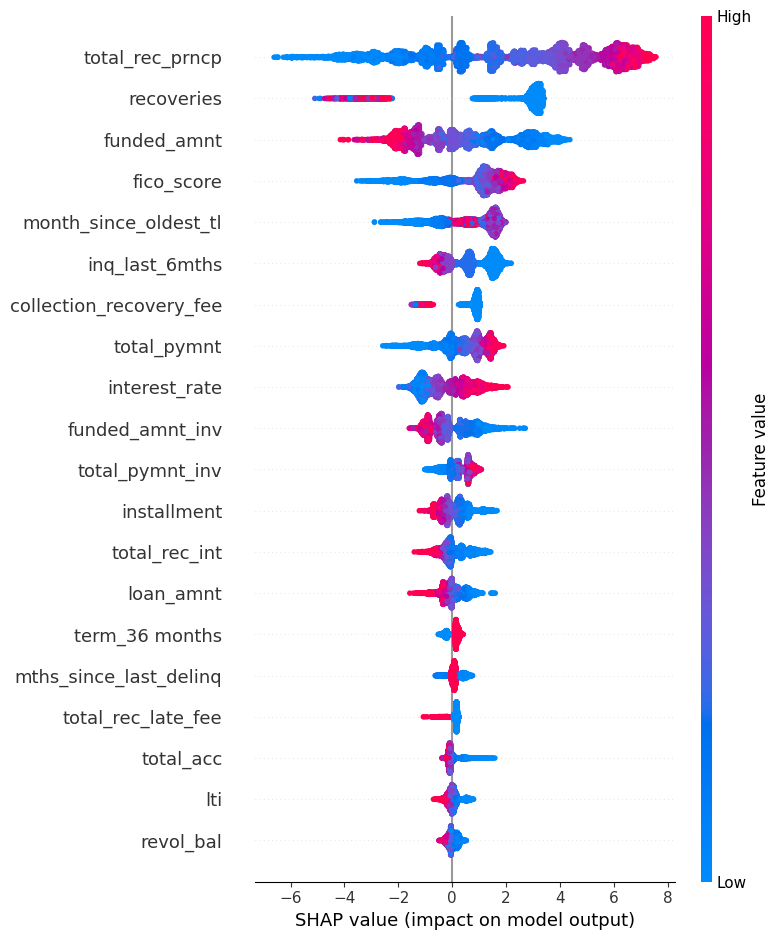

In [108]:
shap_res_test = explainer.shap_values(x_test)
shap.summary_plot(shap_res_test, x_test)

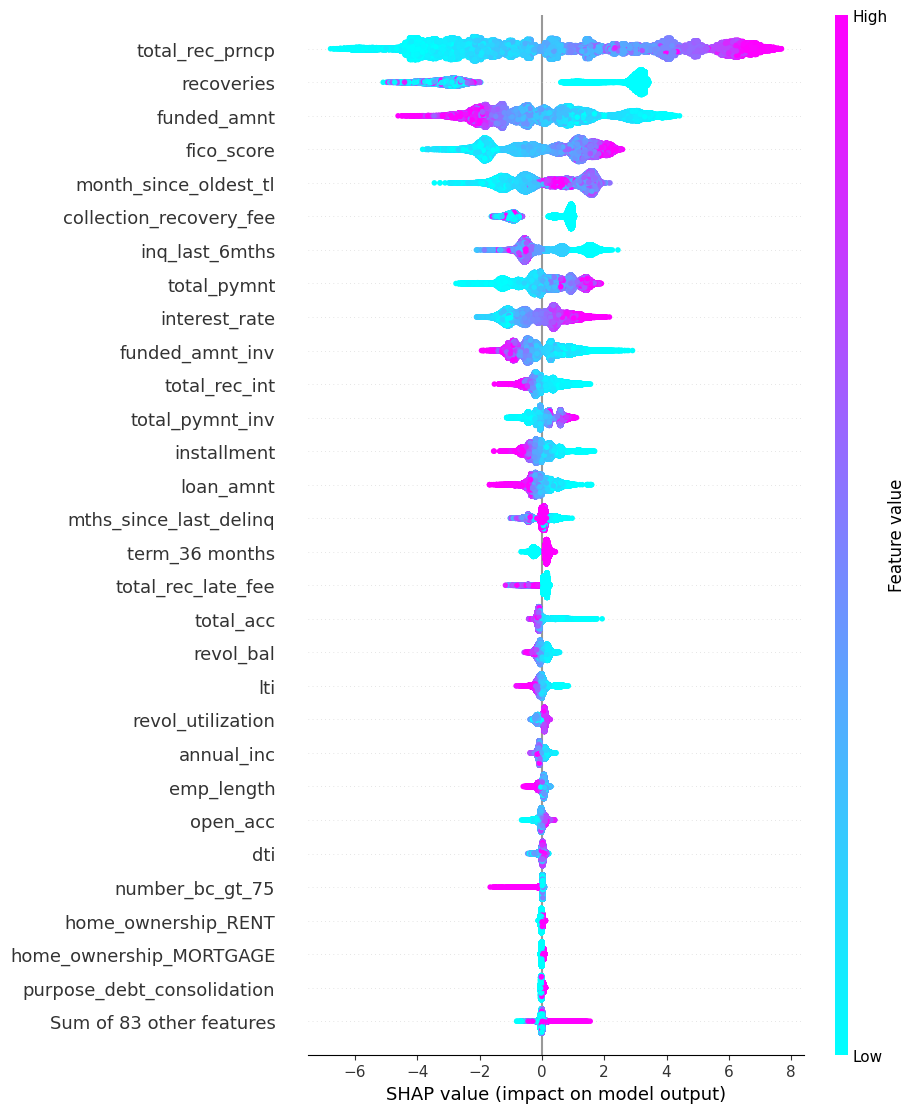

In [122]:
shap.plots.beeswarm(shap_values, max_display=30, color=plt.get_cmap("cool"))

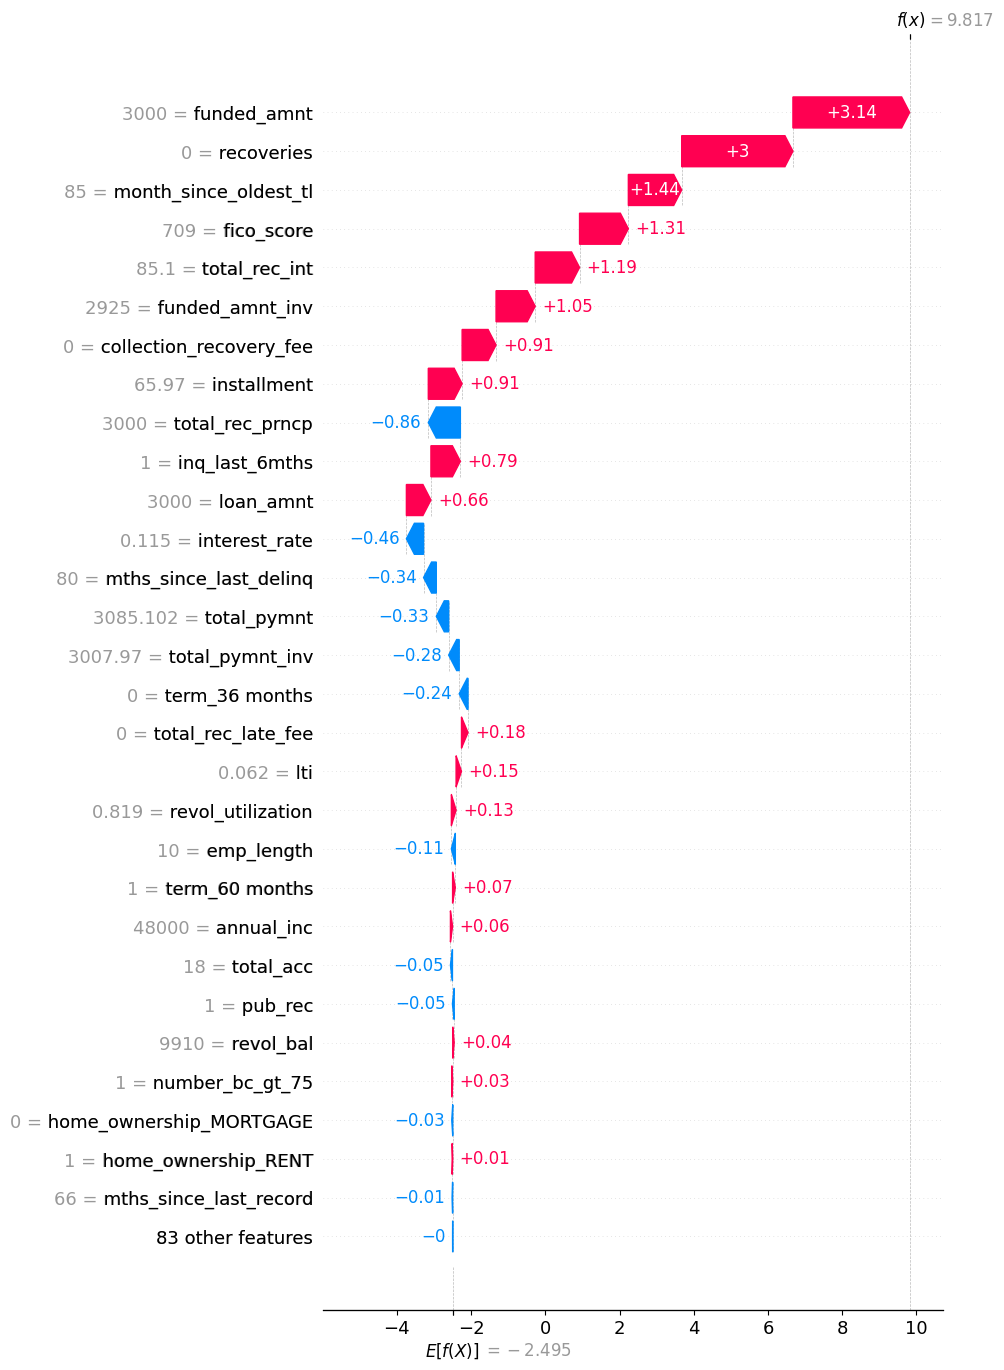

In [124]:
shap.plots.waterfall(shap_values[0], max_display=30)